# Introduction

### In this notebook we shall plot some relevant statistics and discover some important information about the dataset

In [1]:
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np 
import seaborn as sns 

In [2]:
%config Completer.use_jedi = False

In [3]:
sales_df = pd.read_csv("sales_table.csv", delimiter=';')
#remove idx 0, because it's a null row
sales_df = sales_df.drop(0)
sales_df = sales_df.reset_index(drop=True)


### Firstly, we plot some rows of the dataset table

In [4]:
sales_df

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.265302,50.0,Smart TV,Origin ef2b,"0,0"
1,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.177077,60.0,Smart TV,Origin ef2b,"0,0"
2,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.468989,0.0,Smart TV,Origin ef2b,"0,0"
3,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.401168,50.0,Smart TV,Origin ef2b,"0,0"
4,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.452489,50.0,Smart TV,Origin ef2b,"0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599823,14011995,238362,7586641,7586641,5736172,2016-06-30 23:59:57,2016-06-16 12:10:46,Phisical book,Personal finance,-0.345361,0.0,eReaders,Origin 3022,"0,0"
1599824,14012431,61279,589022,589022,946067,2016-06-30 21:40:11,2013-06-15 16:41:06,Phisical book,Personal finance,-0.471786,0.0,Smart TV,Origin ef2b,"0,0"
1599825,14343996,215242,1186145,1186145,6473172,2016-05-13 16:45:42,2016-03-26 17:59:47,Phisical book,Negotiation,-0.359158,0.0,Smart TV,Origin ef2b,"0,0"
1599826,14344113,215242,1186145,1186145,6473172,2016-06-22 14:39:05,2016-03-26 17:59:47,Phisical book,Negotiation,-0.359158,0.0,Smart TV,Origin ef2b,"0,0"


### And we plot some relevant info as well. Here we can see that there are no missing or null values, which greatly facilitates the preprocessing.

In [5]:
def basic_data_info(df):
    
    print("\n--------Information--------\n")
    print(df.info())
    print("\n--------Data Types--------\n")
    print(df.dtypes)
    print("\n--------Missing Values--------\n")
    print(df.isnull().sum())
    print("\n--------Null Values--------\n")
    print(df.isna().sum())

basic_data_info(sales_df)


--------Information--------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599828 entries, 0 to 1599827
Data columns (total 14 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   purchase_id                      1599828 non-null  int64  
 1   product_id                       1599828 non-null  int64  
 2   affiliate_id                     1599828 non-null  int64  
 3   producer_id                      1599828 non-null  int64  
 4   buyer_id                         1599828 non-null  int64  
 5   purchase_date                    1599828 non-null  object 
 6   product_creation_date            1599828 non-null  object 
 7   product_category                 1599828 non-null  object 
 8   product_niche                    1599828 non-null  object 
 9   purchase_value                   1599828 non-null  float64
 10  affiliate_commission_percentual  1599828 non-null  float64
 11  purchase_device     

# Feature statistics: "product_category" 
### Let's begin exploring the categorical features, which are most likely to be important for any sale analysis. Firstly, we plot a bar plot and a pie plot for the 'product_category' feature occurance counts, and we can clearly observe that the category 'phisical book' clearly dominate the occurance counts, with more than 75% of the total occurances. The only other categories that occur with relevant frequency are 'podcast and 'workshop'. 

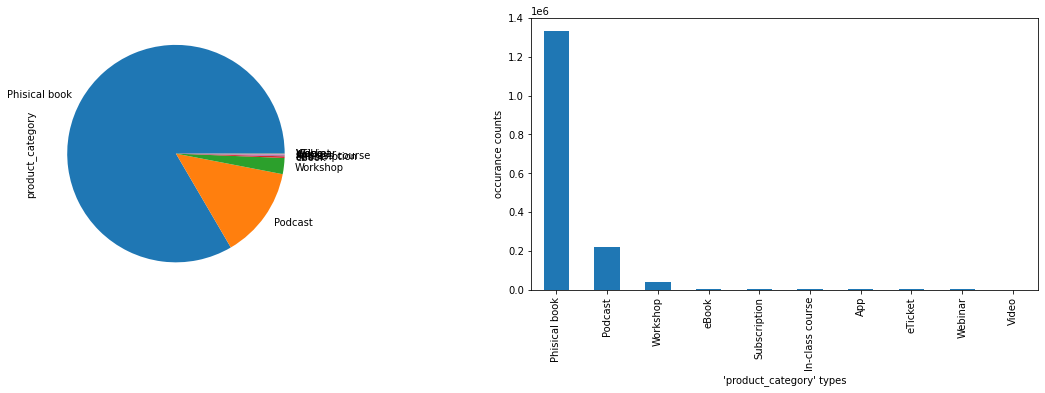

In [6]:
counts = sales_df['product_category'].value_counts()
fig, ax = plt.subplots(figsize=(20,5), ncols=2)
counts.plot(kind='pie', ax=ax[0], )
counts.plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('occurance counts')
ax[1].set_xlabel("'product_category' types")
fig.set_facecolor('white')

### It's also interesting to try to find out how much influence 'product_category' has on the product purchase price, given by the numerical variable 'purchase_value', which is codified in Z-score, i.e., with mean 0 and dp 1. The scatter plot seems to indicate that 'phisical_book' is is the one mostly strongly correlated with higher prices, but podcast and workshop don't fall too behind.

<AxesSubplot:xlabel='product_category', ylabel='purchase_value'>

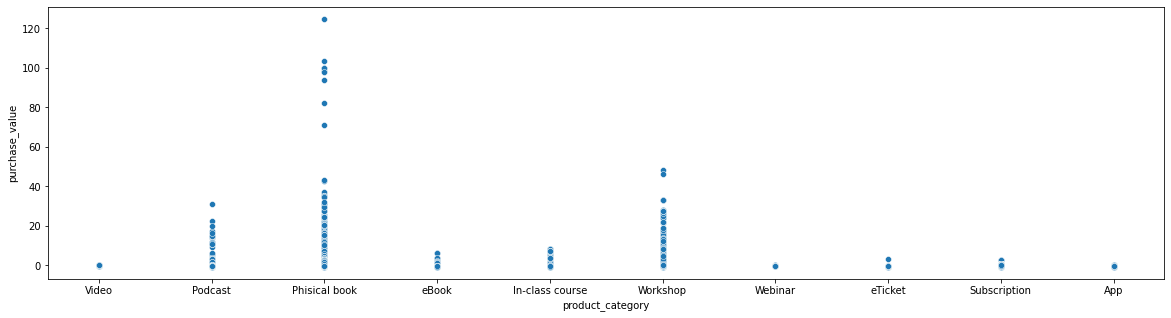

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x="product_category", y="purchase_value", data=sales_df, ax=ax, y_jitter=4)

### But a box plot gives us more precise information regarding the data point concentration around the median, which reveals that actually it is 'workshop' the one type whose median, as well as most of its distribution, gets the highest purchase value. We also plot the mean value alogside each boxplot, symbolized by the white circle, and we can see that 'workshop' also has the highest mean.

<AxesSubplot:xlabel='product_category', ylabel='purchase_value'>

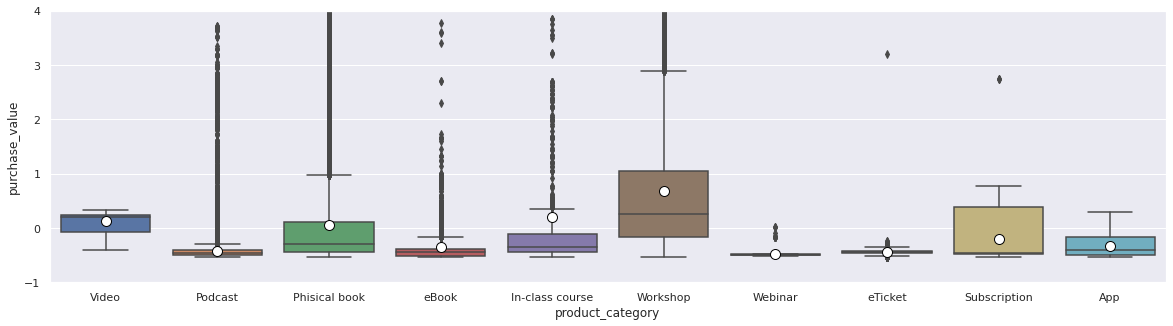

In [8]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,5))
ax.set(ylim=(-1, 4))
meansprop ={"marker":"o",
            "markerfacecolor":"white", 
            "markeredgecolor":"black",
            "markersize":"10"}
sns.boxplot(x="product_category", y="purchase_value", data=sales_df, ax=ax, showmeans='True', meanprops=meansprop)

# Feature statistics: "product_niche" 
### Let's now explore another categorical feature: 'product_niche'. The categories of this feature are considerably more evenly spread across the dataset, with some dominance by the types 'negotiation', 'axiety management', 'personal finance' and 'presentation skills', with these 4 types together making up slightly more than 50 % of the occurance counts. The reminder features are almost evenly distributed throughout the the rest of the counts.


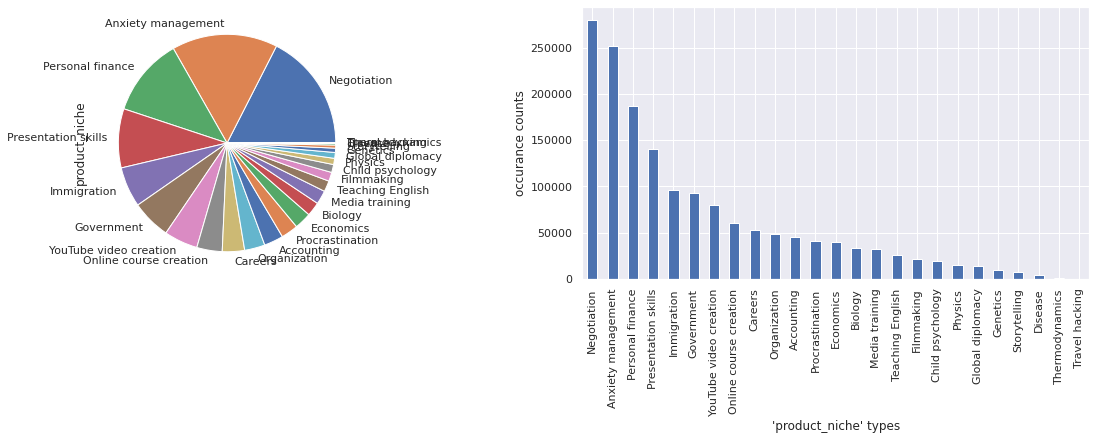

In [9]:
counts = sales_df['product_niche'].value_counts()
fig, ax = plt.subplots(figsize=(20,5), ncols=2)
counts.plot(kind='pie', ax=ax[0], )
counts.plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('occurance counts')
ax[1].set_xlabel("'product_niche' types")
fig.set_facecolor('white')

### Now we plot a scatterplot for the purchase value of different types of 'product_niche', like we did for 'product_category'. We can also note a more seemingly evenly spready distribution, with 'presentation_skills', 'media_training', 'negotiation' and 'personal_finance' roughly correlating with the highest prices. 

<AxesSubplot:xlabel='product_niche', ylabel='purchase_value'>

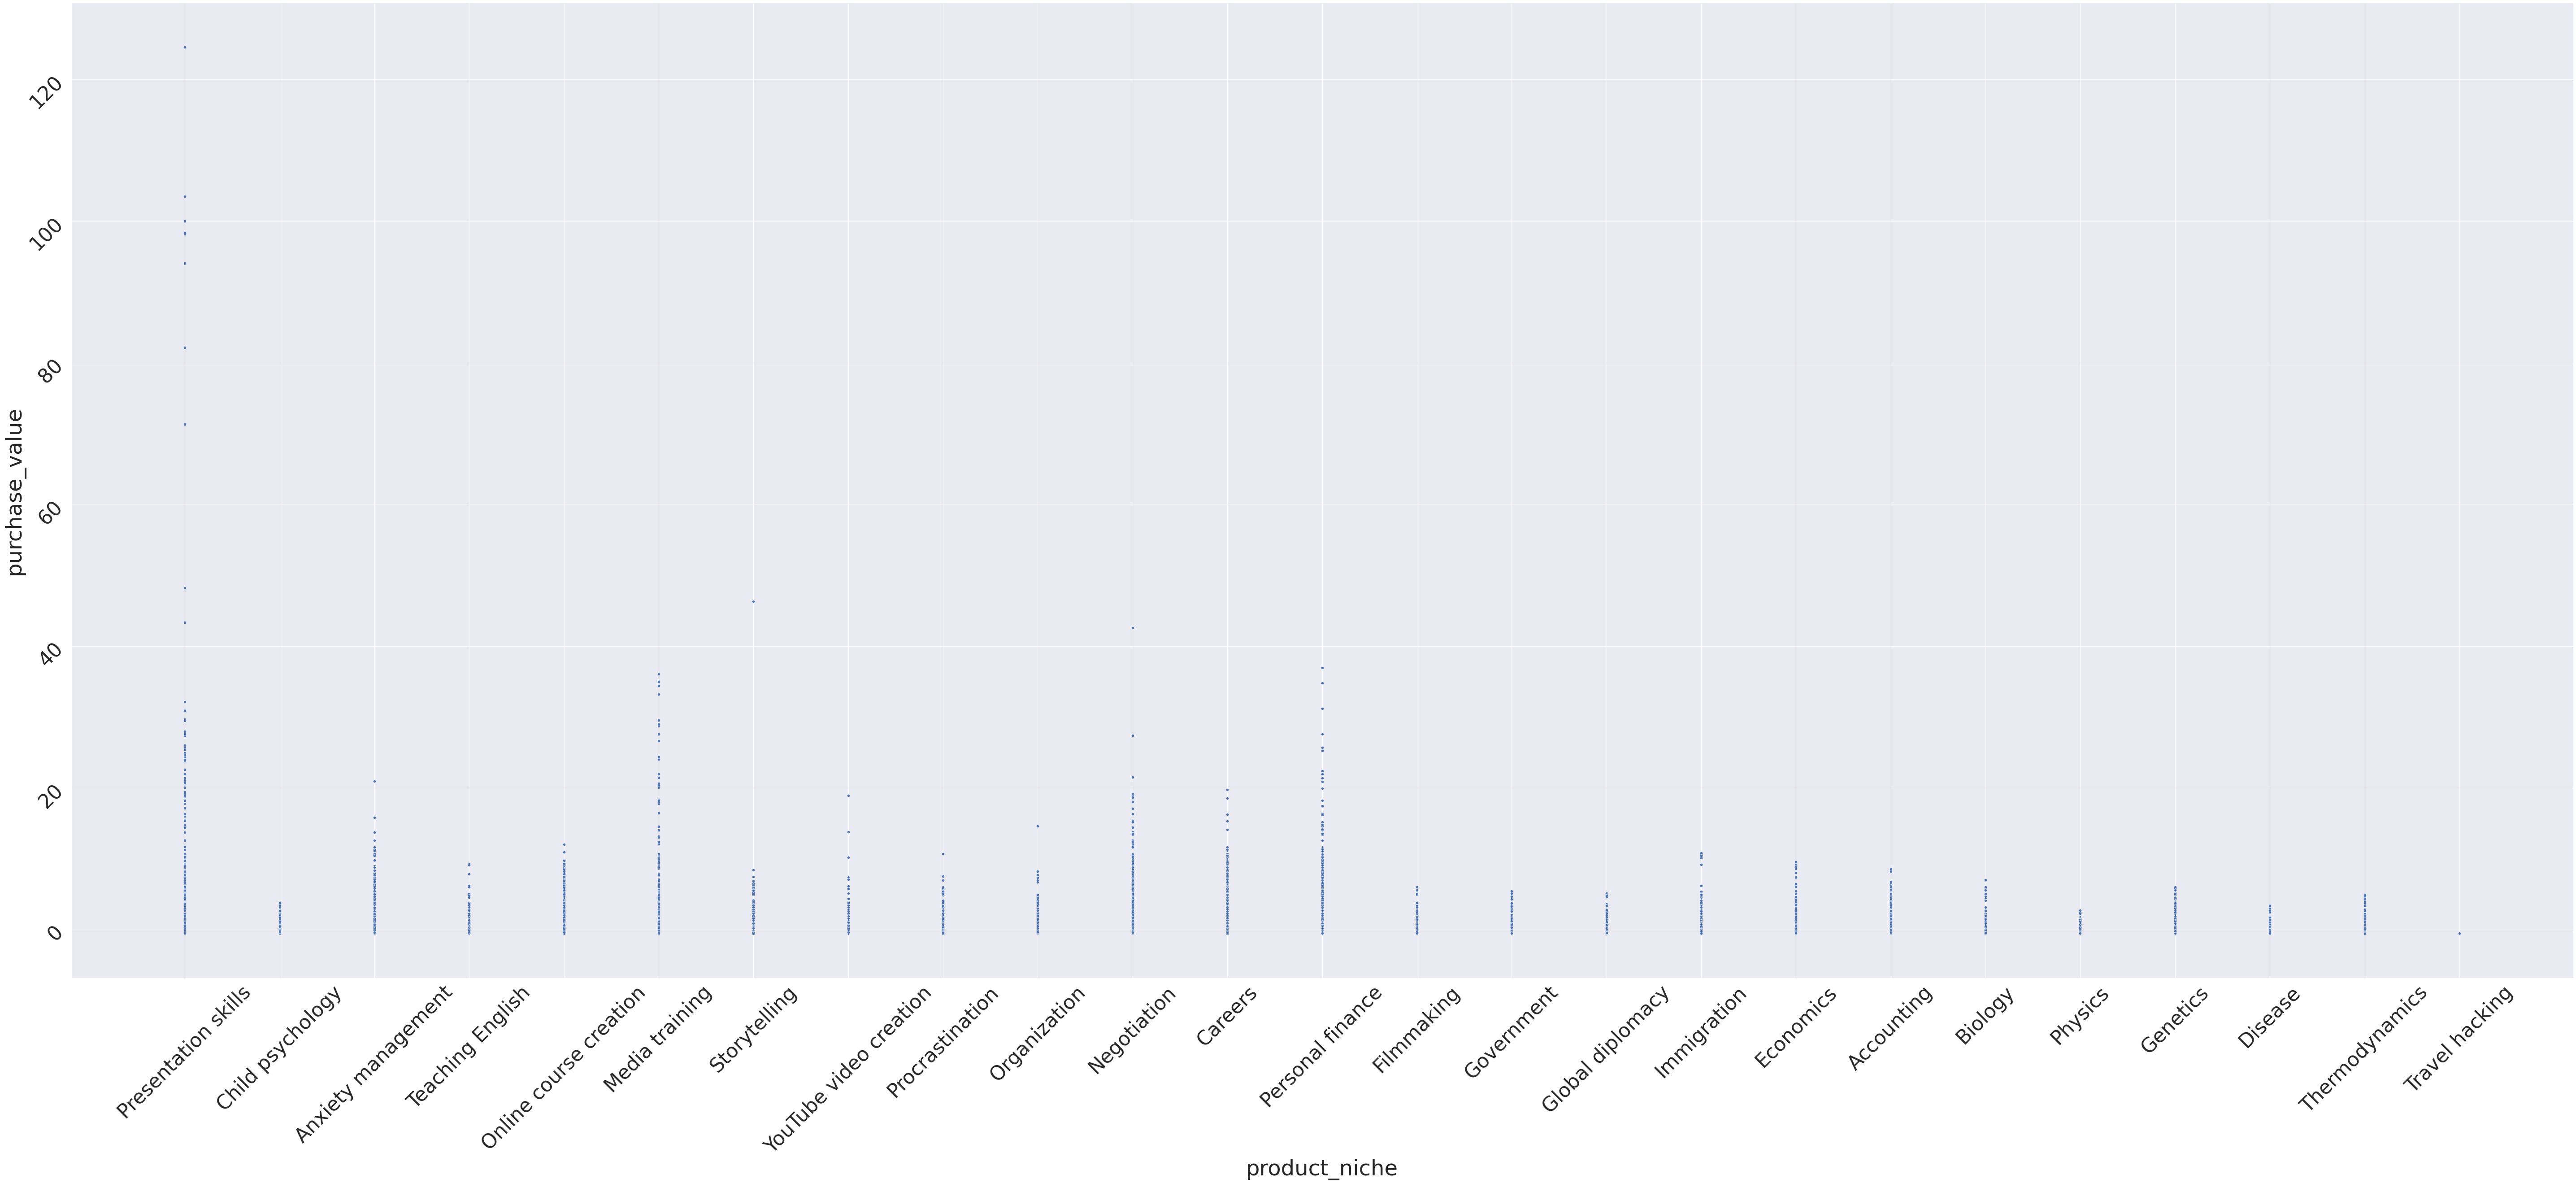

In [10]:
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(100,40))
ax.tick_params(labelrotation=45, )
sns.scatterplot(x="product_niche", y="purchase_value", data=sales_df, ax=ax, y_jitter=4, )

### The boxplot lets us visualize that 'accounting' is the type with the largest quartile concentration around the highest median price value, which also has the highest mean indicated by the white circle. However, most types are roughly concentrated around a z-score of 0, with 'accounting' and 'thermodynamics' displaying the highest variance

<AxesSubplot:xlabel='product_niche', ylabel='purchase_value'>

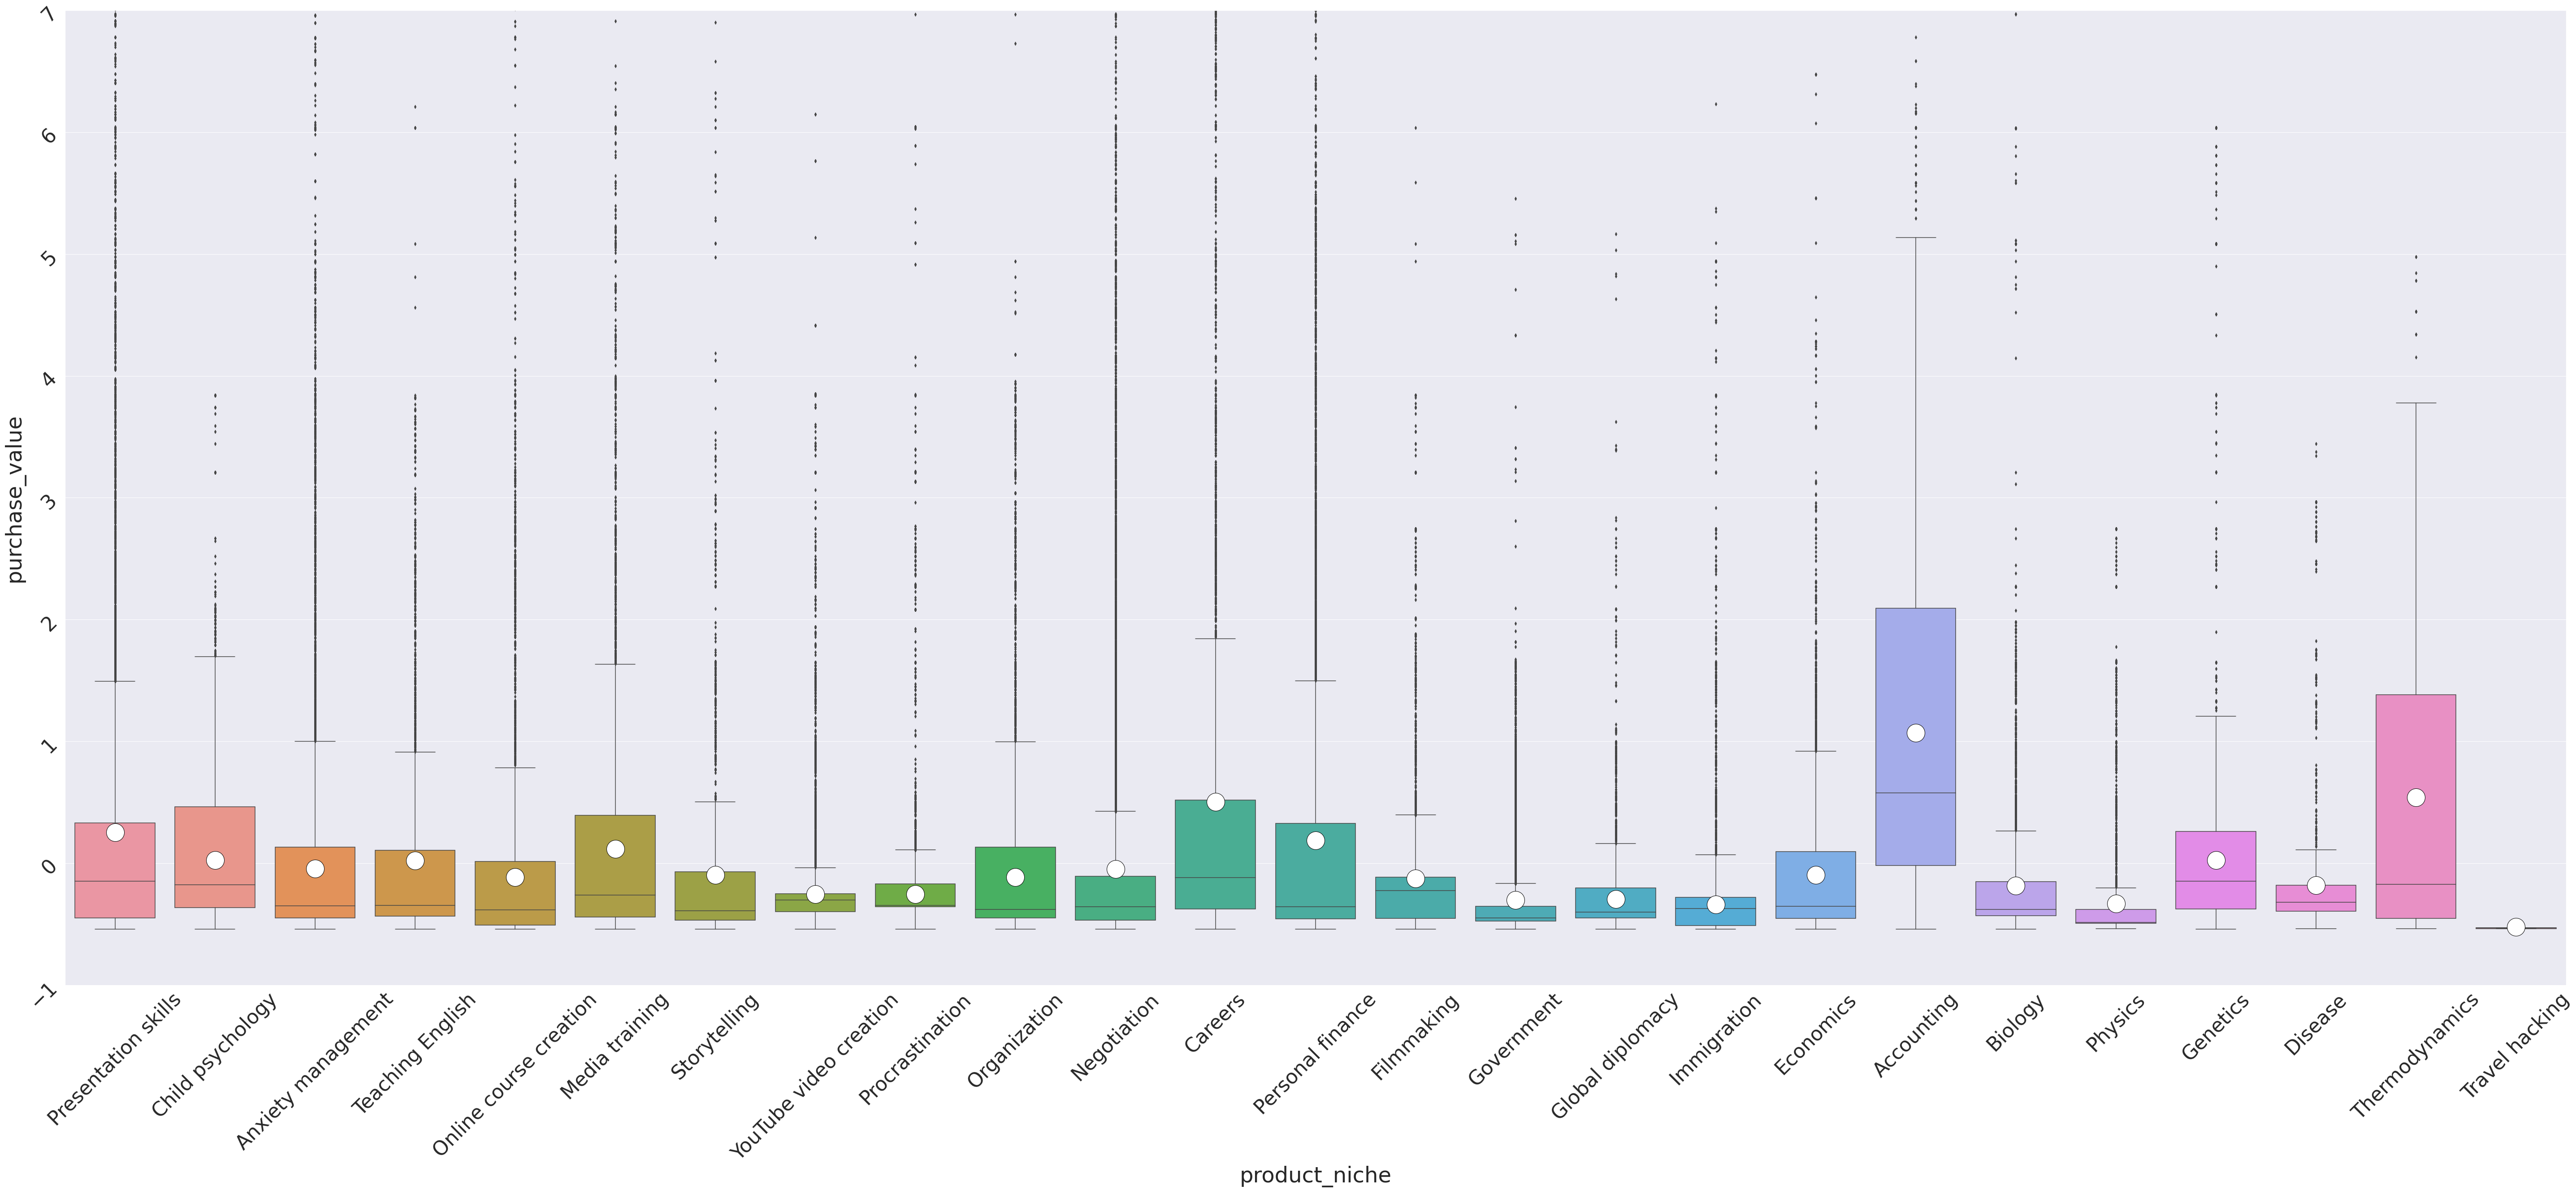

In [11]:
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(100,40))
ax.tick_params(labelrotation=45)
ax.set(ylim=(-1, 7))
ax.tick_params(direction='out')
meansprop ={"marker":"o",
            "markerfacecolor":"white", 
            "markeredgecolor":"black",
            "markersize":"40"}
sns.boxplot(x="product_niche", y="purchase_value", data=sales_df, ax=ax, showmeans='True', meanprops=meansprop)

In [12]:
sales_df

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.265302,50.0,Smart TV,Origin ef2b,"0,0"
1,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.177077,60.0,Smart TV,Origin ef2b,"0,0"
2,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.468989,0.0,Smart TV,Origin ef2b,"0,0"
3,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.401168,50.0,Smart TV,Origin ef2b,"0,0"
4,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.452489,50.0,Smart TV,Origin ef2b,"0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599823,14011995,238362,7586641,7586641,5736172,2016-06-30 23:59:57,2016-06-16 12:10:46,Phisical book,Personal finance,-0.345361,0.0,eReaders,Origin 3022,"0,0"
1599824,14012431,61279,589022,589022,946067,2016-06-30 21:40:11,2013-06-15 16:41:06,Phisical book,Personal finance,-0.471786,0.0,Smart TV,Origin ef2b,"0,0"
1599825,14343996,215242,1186145,1186145,6473172,2016-05-13 16:45:42,2016-03-26 17:59:47,Phisical book,Negotiation,-0.359158,0.0,Smart TV,Origin ef2b,"0,0"
1599826,14344113,215242,1186145,1186145,6473172,2016-06-22 14:39:05,2016-03-26 17:59:47,Phisical book,Negotiation,-0.359158,0.0,Smart TV,Origin ef2b,"0,0"


# Feature statistics: "producers"
### Let's now explore another important feature of the dataset. This feature is categorical, but it has too many types, which hinders a visualization with boxplot. But we can still have a sense of their occurance  distribution across the dataset.

### Firstly, we try to visualize which sellers are selling more products. The bar plot for the top 200 sellers seemingly indicates a dominance of a few sellers.

<AxesSubplot:>

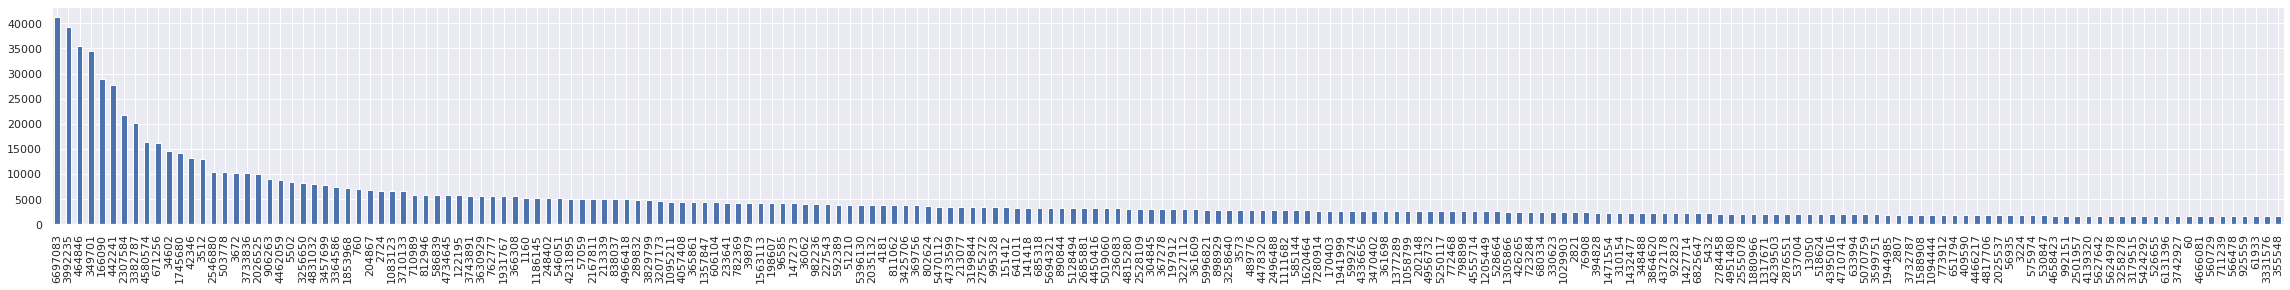

In [13]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(40,4))
sales_df['producer_id'].value_counts().head(200).plot(kind='bar', ax=ax)

### But the count array for each seller bellow lets us vesualize that there are 8020 sellers

In [14]:
sales_df['producer_id'].value_counts()

6697083    41220
3992235    39331
464846     35470
349701     34568
166090     28895
           ...  
2333506        1
846130         1
1563220        1
3662285        1
4800735        1
Name: producer_id, Length: 8020, dtype: int64

### If we plot a pie plot of the top 200, with the reminder sellers results summed, we see that the top 200 roughly make 65 % of all sales. Which means that 2% of the sellers are responsible for the majority of sales.

top 200 counts + remainder summed:
  6697083     41220
 3992235     39331
 464846      35470
 349701      34568
 166090      28895
             ...  
 925559       1602
 61933        1594
 3331576      1582
 355548       1576
-1          604015
Name: producer_id, Length: 201, dtype: int64


<AxesSubplot:ylabel='producer_id'>

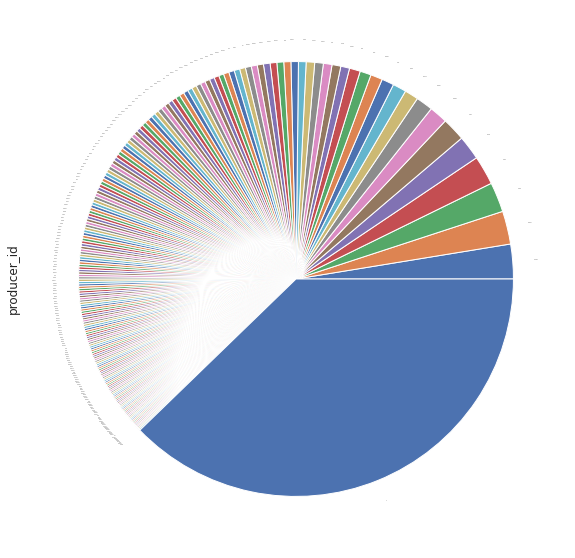

In [15]:
counts_top_200 = sales_df['producer_id'].value_counts().head(200)
counts_top_200[-1] = len(sales_df)-counts_top_200.sum()
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(40,10))
print('top 200 counts + remainder summed:\n', counts_top_200)
counts_top_200.plot(kind='pie', ax=ax, fontsize=1)

# Feature statistics: sales through time
### Can we notice some tendency in sales by using the date information of the dataset? That's what we will try to answear bellow. The following code permits us to visualize the sales counts by day by filtering the hour of the day from the string "purchase_date" and creating additional columns for the day of the product purchase

In [16]:
def get_date_day(date):
    try:
        split_date = date.split(' ')[0].split('-')
        return split_date[0]+'-'+split_date[1]+'-'+split_date[2]
    except:
        print("Exception occured with date {}".format(date))

In [17]:
sales_df['purchase_date_by_day'] = sales_df['purchase_date'].apply( lambda x : get_date_day(x))

In [18]:
day_counts = sales_df['purchase_date_by_day'].value_counts()

In [19]:
sales_evolution_by_day= day_counts.sort_index()

### we can visualy notice some slight improvvement and spikes in the months 05 and 06, but the pattern didn't change a lot between the months 01 and 06, with a cycle pattern in purchase counts repeating aproximatelly every 8-10 days.

<AxesSubplot:>

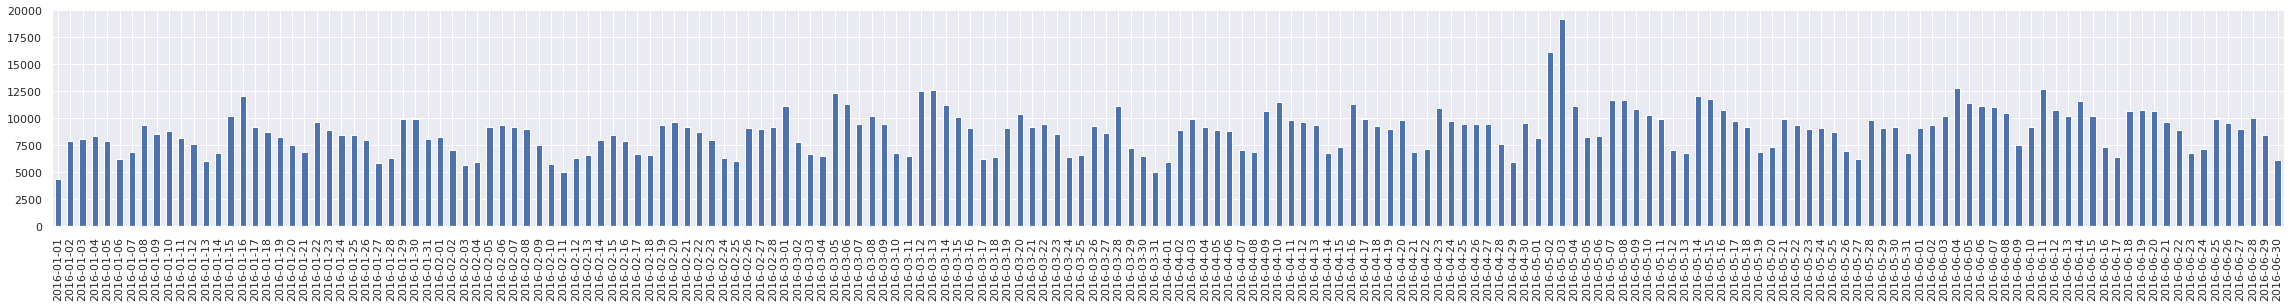

In [20]:
fig, ax = plt.subplots(figsize=(40,4))
sales_evolution_by_day.plot(kind='bar', ax=ax)

# Feature statistics: "purchase_origin"

### Let's now explore another categorical feature in our dataset: 'purchase_origin', which records the website from which a certain product was reached before it was purchased. Again, this feature has too many types, which hinders a visualization with boxplot. But we can still have a sense of their occurance  distribution across the dataset with the barplot.

### Firstly, we try to visualize which sellers are selling more products. The bar plot for the top 200 sellers seemingly indicates a dominance of a 4 websites.

<AxesSubplot:>

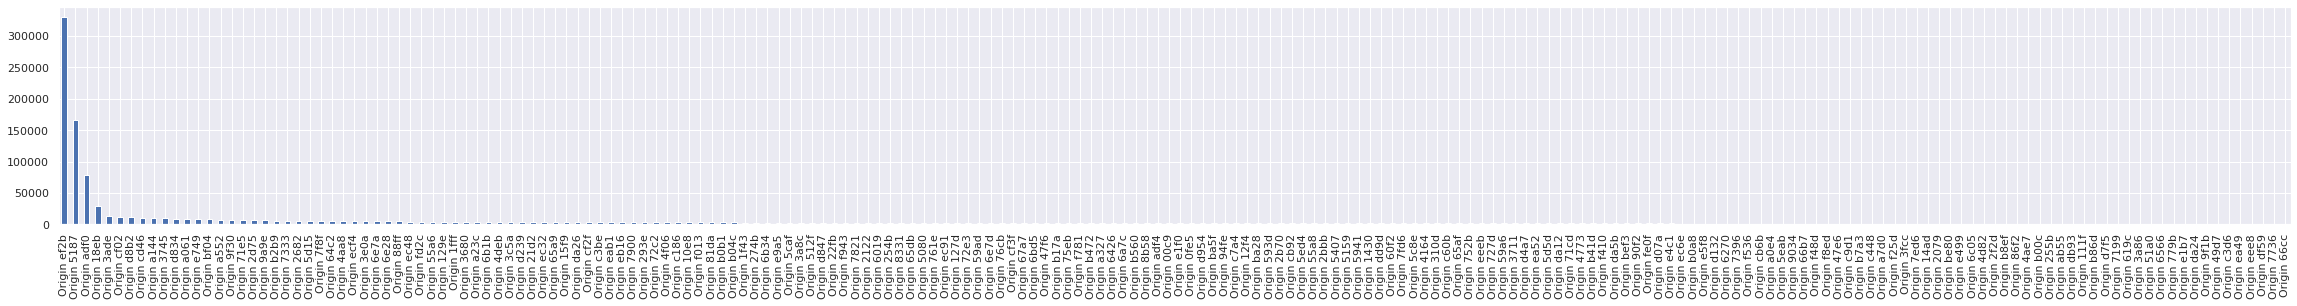

In [21]:
fig, ax = plt.subplots(figsize=(40,4))
sales_df['purchase_origin'].value_counts().head(200).plot(kind='bar', ax=ax)

### The count of websites occurances lets us visualize that there are 9603 recorded addresses

In [22]:
sales_df['purchase_origin'].value_counts()

Origin ef2b    330077
Origin 5187    167028
Origin adf0     77857
Origin 18eb     28693
Origin 3ade     13069
                ...  
Origin 2a26         1
Origin 63f3         1
Origin 92a6         1
Origin d2e9         1
Origin 4b23         1
Name: purchase_origin, Length: 9603, dtype: int64

### If we plot a pie plot of the top 200 website addresses, with the reminder websites results summed, we see that the top 200 roughly are related to almost 75 % of all the sales. This means that 2% of the websites are related with the majority of sales.

top 200 counts + remainder summed:
 Origin ef2b    330077
Origin 5187    167028
Origin adf0     77857
Origin 18eb     28693
Origin 3ade     13069
                ...  
Origin ea49       976
Origin eee8       970
Origin df59       969
Origin 7736       966
Origin 66cc    477897
Name: purchase_origin, Length: 200, dtype: int64


<AxesSubplot:ylabel='purchase_origin'>

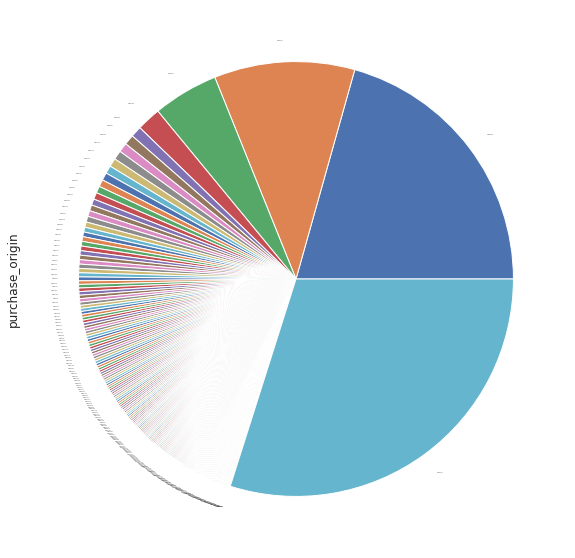

In [23]:
counts_top_200 = sales_df['purchase_origin'].value_counts().head(200)
counts_top_200[-1] = len(sales_df)-counts_top_200.sum()

fig, ax = plt.subplots(figsize=(40,10))
sns.set(font_scale=1)
print('top 200 counts + remainder summed:\n', counts_top_200)
counts_top_200.plot(kind='pie', ax=ax, fontsize=1)